# 2.3 Optimizing Random Forests w/ Hyperparameters

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. Random Forest Model - 2010s
   - Grid Search
   - Random Search
6. Random Forest Model - By Station (Oslo, Maastricht, Kassel)
   - Random Search

## 1. Install Libraries

## 2. Import Libraries

In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

## 3. Import Datasets

In [379]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
path = os.getcwd()
path

NameError: name 'os' is not defined

In [383]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [385]:
climate = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'weather_unscaled_clean.parquet'))
climate.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                     0.0                7.0                 3.7   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   

   DEBILT_sunshine  DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  \
0              0.0               9.3              7.4             11.0   

   DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  \
0                  10.0                  7.0                 11.5   

   HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91              1.001   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  \
0                10.6                9.4                8.3             0.82   

   KASSEL_pressure  KASSEL_global_radiation  KASSEL_precipitation  \
0           1.0094                     0.28                  0.48   

   KASSEL_sunshine  KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
0              1.6               7.9              3.9              9.4   

   LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                 1.0              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                         0.2                      0.0                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  \
0                 -0.6                -1.9                 0.5   

   MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  \
0                   9.5                  8.5                 11.1   

   MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  MUNCHENB_cloud_cover  \
0               7.6              4.4             10.8

In [387]:
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

## 4. Random Forest Model - 2010s

In [389]:
#Define important features for later
ftr = ['cloud_cover',
       'humidity',
       'pressure',
       'global_radiation',
       'precipitation',
       'sunshine',
       'temp_mean',
       'temp_min',
       'temp_max',
      ]

In [391]:
#Convert Date column to date/time column
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
pleasant['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
pleasant.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0 1960-01-01                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [393]:
#Reduce weather data to 2010s
df = climate[(climate['DATE'].dt.year >= 2010) & (climate['DATE'].dt.year < 2020)]
df['DATE'].describe()

count                   3652
mean     2014-12-31 12:00:00
min      2010-01-01 00:00:00
25%      2012-07-01 18:00:00
50%      2014-12-31 12:00:00
75%      2017-07-01 06:00:00
max      2019-12-31 00:00:00
Name: DATE, dtype: object

In [395]:
#Reduce pleasant ratings to 2010s
pl = pleasant[(pleasant['DATE'].dt.year >= 2010) & (pleasant['DATE'].dt.year < 2020)]
pl['DATE'].describe()

count                   3652
mean     2014-12-31 12:00:00
min      2010-01-01 00:00:00
25%      2012-07-01 18:00:00
50%      2014-12-31 12:00:00
75%      2017-07-01 06:00:00
max      2019-12-31 00:00:00
Name: DATE, dtype: object

In [397]:
df.shape

(3652, 137)

In [399]:
df_1 = df.drop(['DATE', 'MONTH'], axis = 1)
df_1.head(1)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
18263               -0.5                5.0             0.93           0.9981   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
18263                     0.12                   0.2              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
18263              -2.6             -3.0             -1.8   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
18263                      8                0.97              0.9926   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
18263                        0.12                     0.46   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
18263                 0.0                  6.9                 5.5   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
18263                 7.7                       7                 0.91   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82           1.0107                     0.46   

       MA

In [401]:
pl_1 = pl.drop(['DATE'], axis = 1)
pl_1.head(1)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [403]:
#Define X & y for data split
X = df_1
y = pl_1

In [405]:
X.shape

(3652, 135)

In [407]:
y.shape

(3652, 15)

In [255]:
#Because y should be (3652), using sum of binary across all 15 stations (argmax would only look at the first station to produce a positive (1) rating
y = pl_1.sum(axis=1)
y.shape

(3652,)

In [409]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [411]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [261]:
#Grid Search

In [413]:
# creating a RF classifier
clf = RandomForestClassifier()

In [429]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [431]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Search took 4.2479898691177365 minutes


In [433]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6487464765647147


In [271]:
#Random Search

In [435]:
#Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [441]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [443]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=500, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [446]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 53, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.650460095402704


In [448]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6487464765647147
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 53, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.650460095402704


In [450]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier with specific parameter choices (random search due to slightly improved accuracy score)
clf3 = RandomForestClassifier(
    max_depth=50,
    n_estimators=410,  
    max_features=53,
    criterion='gini', 
    min_samples_leaf=1,
    min_samples_split=4,
)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=53, min_samples_split=4,
                       n_estimators=410)

In [451]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.652530779753762


In [454]:
#Define labels of stations for random forest plot
stn = ['BASEL',
       'BELGRADE',
       'BUDAPEST',
       'DEBILT',
       'DUSSELDORF',
       'HEATHROW',
       'KASSEL',
       'LJUBLJANA',
       'MAASTRICHT',
       'MADRID',
       'MUNCHENB',
       'OSLO',
       'SONNBLICK',
       'STOCKHOLM',
       'VALENTIA'
      ]

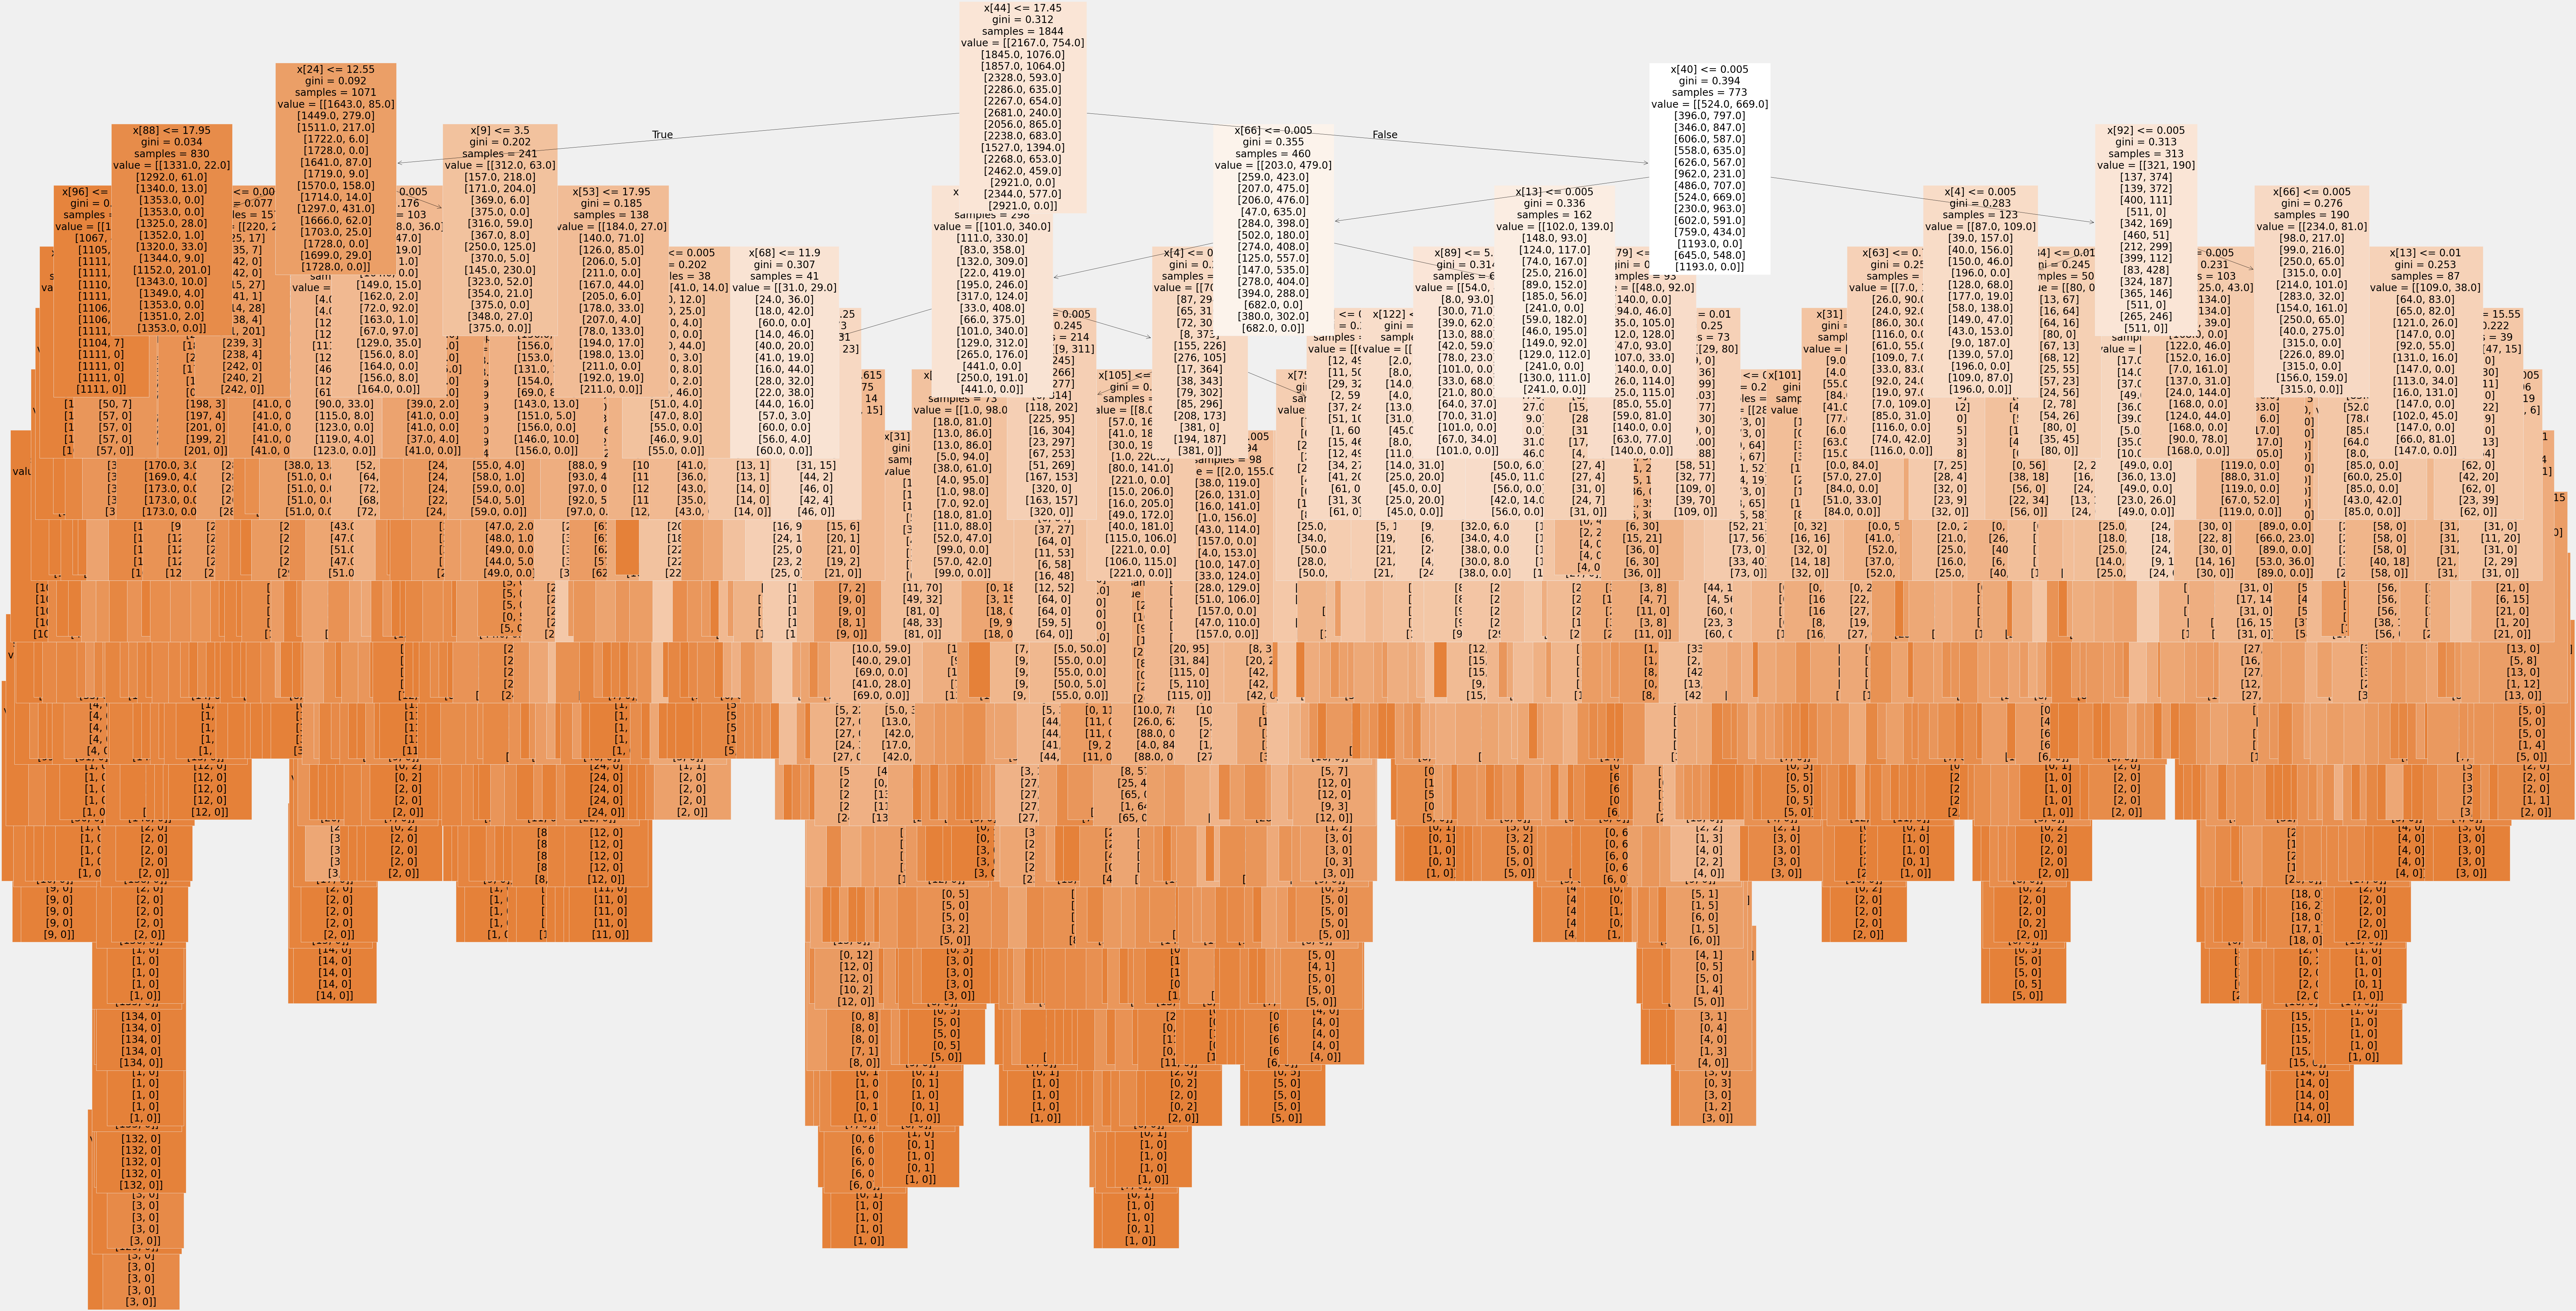

In [456]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=stn, filled=True);
plt.show()

In [458]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([1.22185802e-03, 1.95869890e-03, 1.81658051e-03, 1.71422013e-03,
       3.27472334e-02, 4.18651306e-03, 1.28618157e-02, 1.54372760e-03,
       8.81000550e-02, 2.34383726e-03, 2.12219060e-03, 1.85869077e-03,
       1.49561634e-03, 2.89768740e-02, 1.88636520e-03, 3.36334812e-03,
       1.60230564e-03, 8.48468382e-03, 1.67821702e-04, 0.00000000e+00,
       0.00000000e+00, 7.31783478e-04, 2.83599633e-02, 7.28333410e-04,
       7.33516207e-03, 1.59529645e-03, 1.91128990e-02, 9.62664155e-04,
       1.43041776e-03, 1.79518702e-03, 2.03097450e-03, 1.90522677e-02,
       2.26071939e-03, 2.84909198e-03, 1.68207763e-03, 4.45252843e-02,
       9.76695573e-04, 1.48765557e-03, 1.65265077e-03, 1.66190152e-03,
       3.41445999e-02, 2.35218368e-03, 4.31944853e-03, 1.57307544e-03,
       1.18964450e-01, 1.56740935e-03, 2.93116732e-03, 1.95014842e-03,
       2.77485842e-03, 1.52389754e-02, 3.05728877e-03, 2.48701256e-03,
       1.60045355e-03, 8.50185107e-03, 1.39660881e-03, 9.70955266e-04,
      

In [460]:
np.set_printoptions(threshold=1000)

In [462]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[1.22185802e-03, 1.95869890e-03, 1.81658051e-03, 1.71422013e-03,
         3.27472334e-02, 4.18651306e-03, 1.28618157e-02, 1.54372760e-03,
         8.81000550e-02, 2.34383726e-03, 2.12219060e-03, 1.85869077e-03,
         1.49561634e-03, 2.89768740e-02, 1.88636520e-03],
        [3.36334812e-03, 1.60230564e-03, 8.48468382e-03, 1.67821702e-04,
         0.00000000e+00, 0.00000000e+00, 7.31783478e-04, 2.83599633e-02,
         7.28333410e-04, 7.33516207e-03, 1.59529645e-03, 1.91128990e-02,
         9.62664155e-04, 1.43041776e-03, 1.79518702e-03],
        [2.03097450e-03, 1.90522677e-02, 2.26071939e-03, 2.84909198e-03,
         1.68207763e-03, 4.45252843e-02, 9.76695573e-04, 1.48765557e-03,
         1.65265077e-03, 1.66190152e-03, 3.41445999e-02, 2.35218368e-03,
         4.31944853e-03, 1.57307544e-03, 1.18964450e-01],
        [1.56740935e-03, 2.93116732e-03, 1.95014842e-03, 2.77485842e-03,
         1.52389754e-02, 3.05728877e-03, 2.48701256e-03, 1.60045355e-03,
         8.50185107e-03

In [464]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.0665759 , 0.03779349, 0.07107267, 0.01508606, 0.1221234 ,
       0.05890927, 0.07914007, 0.04121918, 0.10922267, 0.03079823,
       0.06540976, 0.05363363, 0.02647436, 0.08647694, 0.13606437])

In [466]:
important = pd.Series(sumarray, index = stn) #.sort_values(ascending = False)
important

BASEL         0.066576
BELGRADE      0.037793
BUDAPEST      0.071073
DEBILT        0.015086
DUSSELDORF    0.122123
HEATHROW      0.058909
KASSEL        0.079140
LJUBLJANA     0.041219
MAASTRICHT    0.109223
MADRID        0.030798
MUNCHENB      0.065410
OSLO          0.053634
SONNBLICK     0.026474
STOCKHOLM     0.086477
VALENTIA      0.136064
dtype: float64

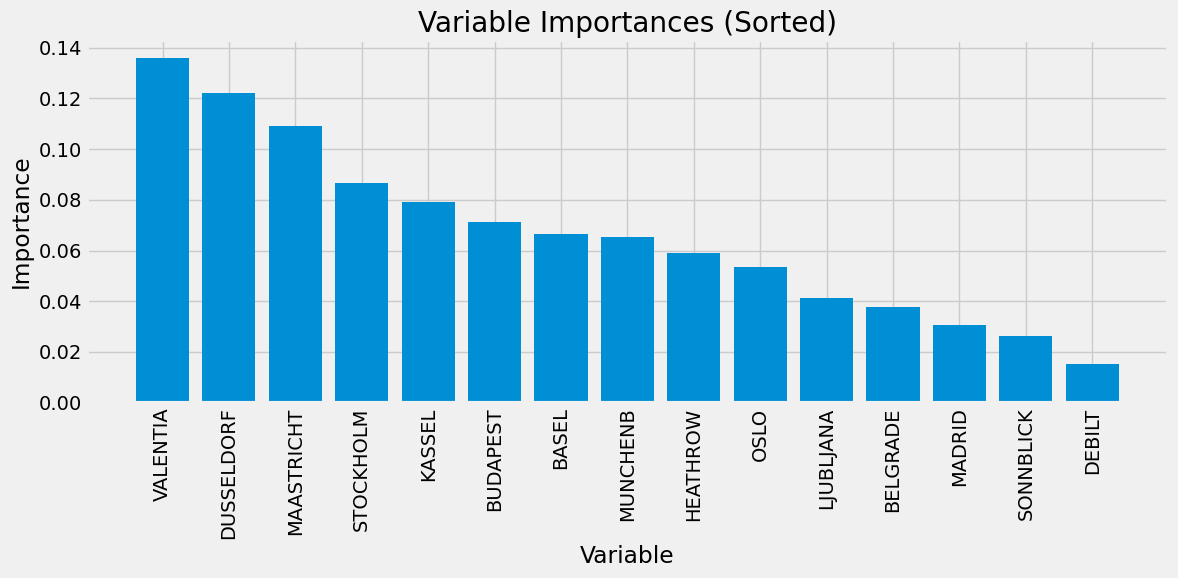

In [468]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# Sort the data in descending order
sorted_indices = np.argsort(important)[::-1]
sorted_important = np.array(important)[sorted_indices]
sorted_stn = np.array(stn)[sorted_indices]

# Create the plot
plt.figure(figsize=(12, 6))
x_values = list(range(len(sorted_important)))
plt.bar(x_values, sorted_important, orientation='vertical')
plt.xticks(x_values, sorted_stn, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances (Sorted)')
plt.tight_layout()
plt.show()


## 5. Optimized Random Forest Model - (Valentia)

In [127]:
climate.columns.unique().tolist()

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSS

#### Valentia Dataframe

In [472]:
val = climate[['VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']]
val.head(1)

VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9

In [474]:
val.shape

(22950, 9)

In [476]:
val_pl = pleasant[['VALENTIA_pleasant_weather']]
val_pl.head(1)

VALENTIA_pleasant_weather
0                          0

In [478]:
val_pl.shape

(22950, 1)

In [480]:
#Define X & y for data split
X = val
y = val_pl

In [482]:
#Because y should be (3652), using sum of binary across all 15 stations (argmax would only look at the first station to produce a positive (1) rating
y = val_pl.sum(axis=1)
y.shape

(22950,)

In [484]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [486]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [498]:
#Random Search

In [536]:
# creating a RF classifier
clf5 = RandomForestClassifier()

In [538]:
#Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [540]:
start = time.time()
rf_random = RandomizedSearchCV(clf5, rs_space, n_iter=500, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Search took 1.57770015001297 minutes


In [542]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 103, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 110}
Best RANDOM search score is: 1.0


In [544]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier with specific parameter choices (random search due to slightly improved accuracy score)
clf6 = RandomForestClassifier(
    max_depth=90,
    n_estimators=110,  
    max_features=103,
    criterion='entropy', 
    min_samples_leaf=2,
    min_samples_split=4,
)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=90, max_features=103,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=110)

In [546]:
# performing predictions on the test dataset
y_pred = clf6.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


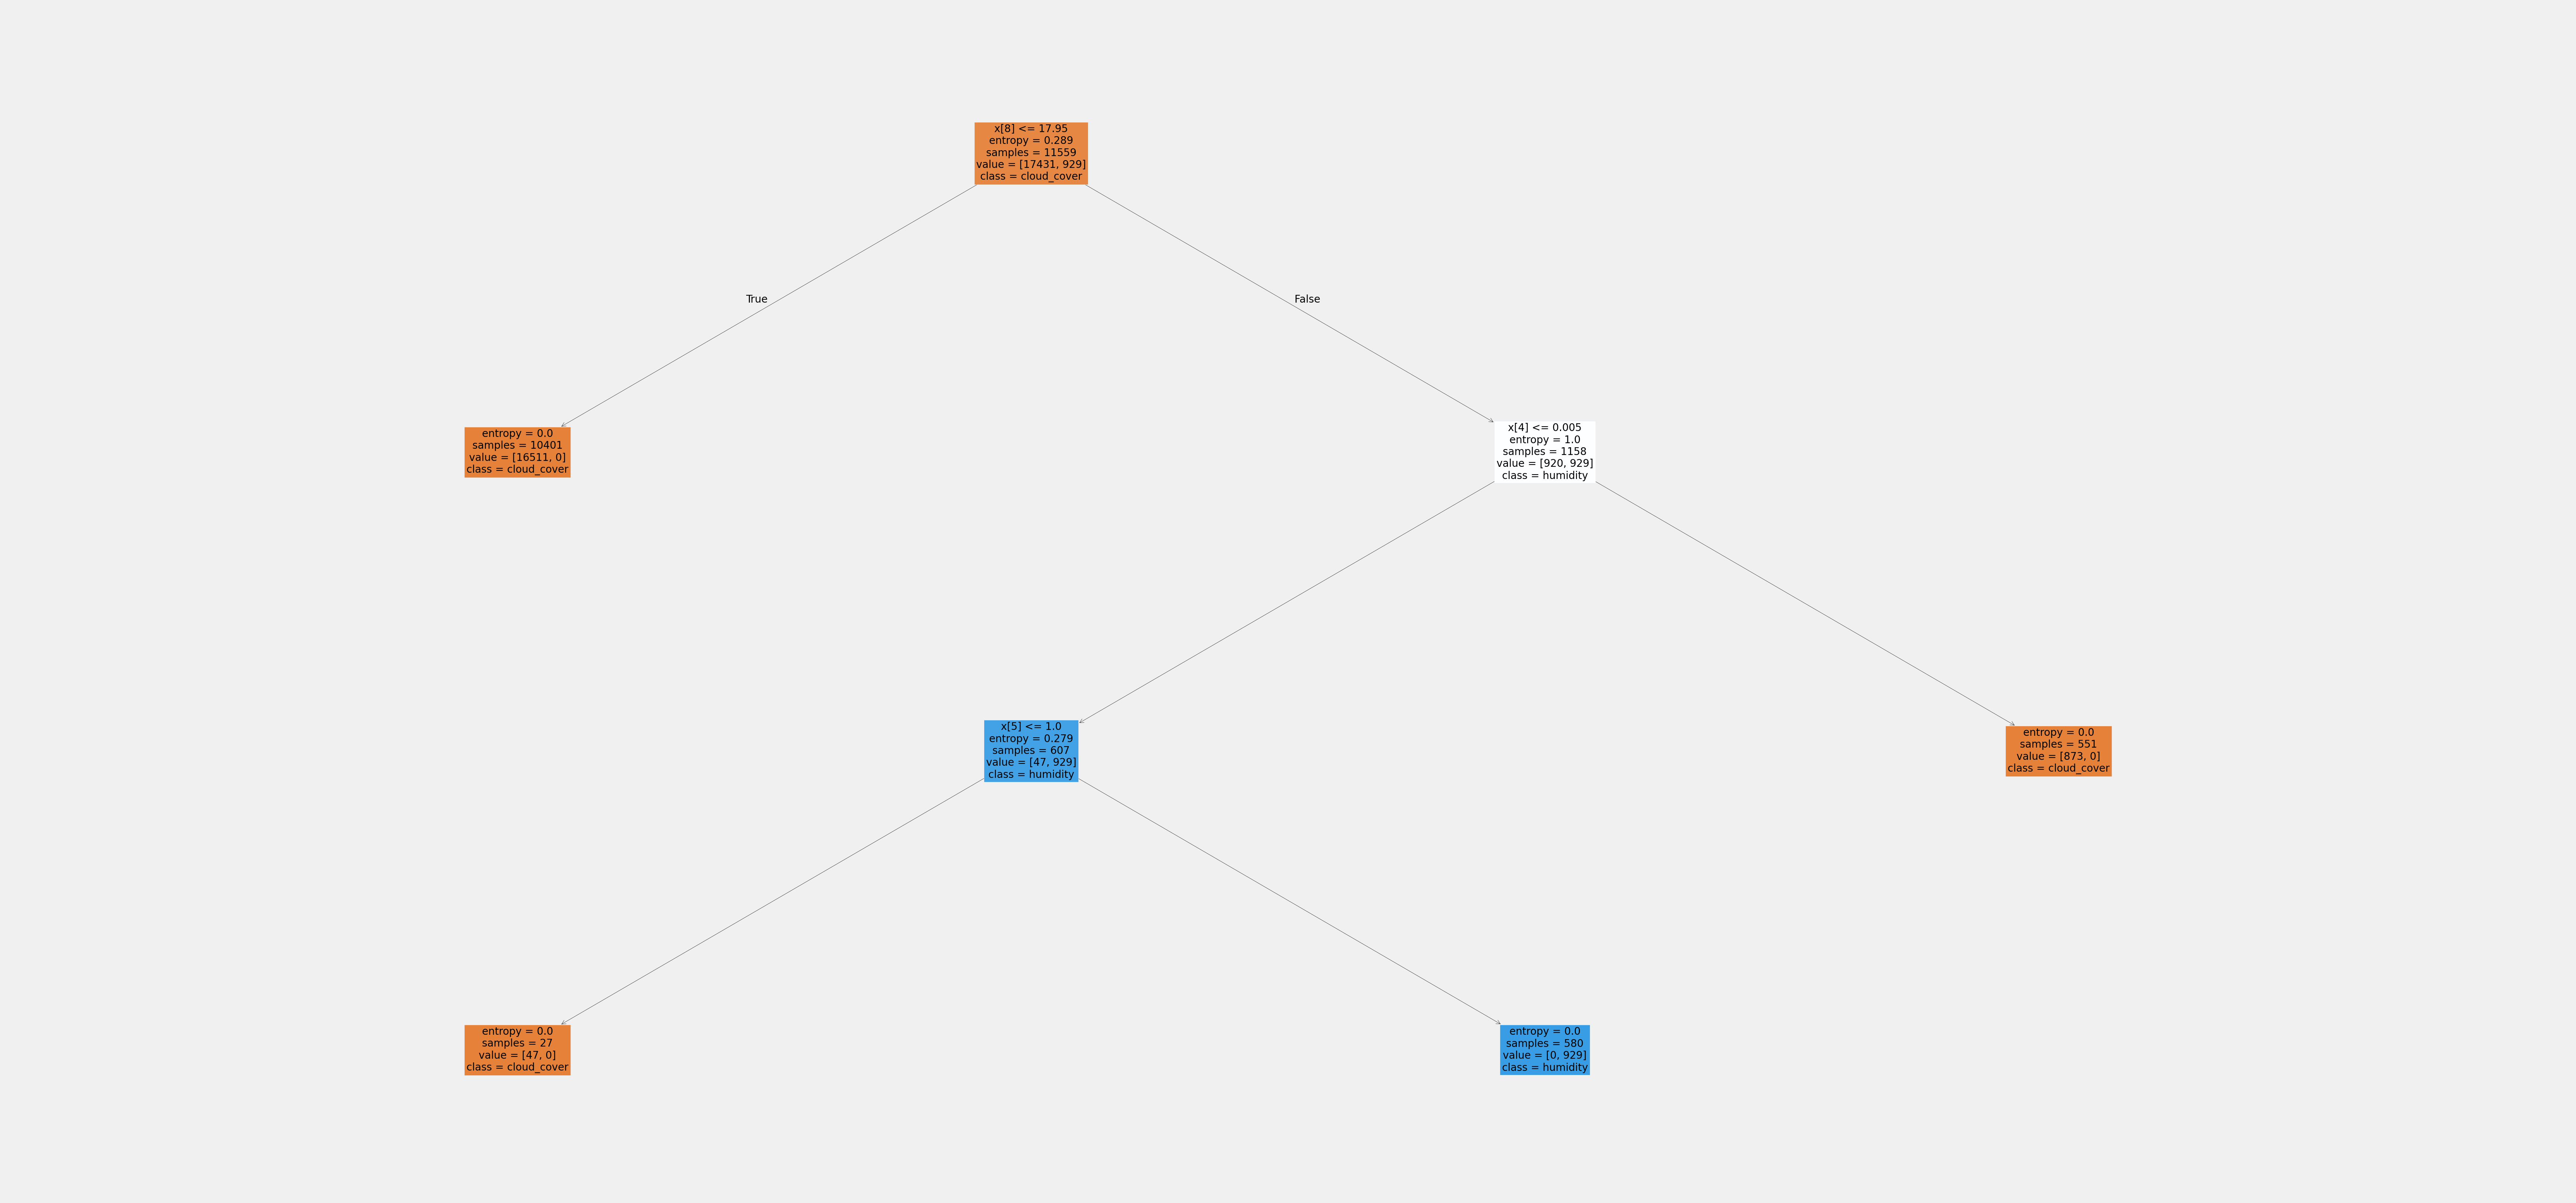

In [548]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf6.estimators_[15], fontsize = 20, class_names=ftr, filled=True);
plt.show()

In [550]:
np.set_printoptions(threshold=np.inf)
newarray = clf6.feature_importances_
#print(clf.feature_importances_.shape)
newarray

[CV 3/3] END criterion=entropy, max_depth=90, max_features=103, min_samples_leaf=2, min_samples_split=4, n_estimators=110;, score=1.000 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=10, max_features=111, min_samples_leaf=1, min_samples_split=8, n_estimators=210;, score=1.000 total time=   0.7s
[CV 3/3] END criterion=entropy, max_depth=70, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=360;, score=1.000 total time=   1.3s
[CV 2/3] END criterion=gini, max_depth=80, max_features=92, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=80, max_features=92, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=60, min_samples_leaf=3, min_samples_split=6, n_estimators=60;, score=1.000 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=20, max_features=56, min_samples_leaf=1, min_sa

array([0.        , 0.        , 0.        , 0.        , 0.29486508,
       0.05219667, 0.        , 0.        , 0.65293825])

In [552]:
np.set_printoptions(threshold=1000)

In [554]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.        , 0.        , 0.        , 0.        , 0.29486508,
         0.05219667, 0.        , 0.        , 0.65293825]]])

In [556]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.        , 0.        , 0.        , 0.        , 0.29486508,
       0.05219667, 0.        , 0.        , 0.65293825])

In [558]:
important = pd.Series(sumarray, index = ftr) #.sort_values(ascending = False)
important

cloud_cover         0.000000
humidity            0.000000
pressure            0.000000
global_radiation    0.000000
precipitation       0.294865
sunshine            0.052197
temp_mean           0.000000
temp_min            0.000000
temp_max            0.652938
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


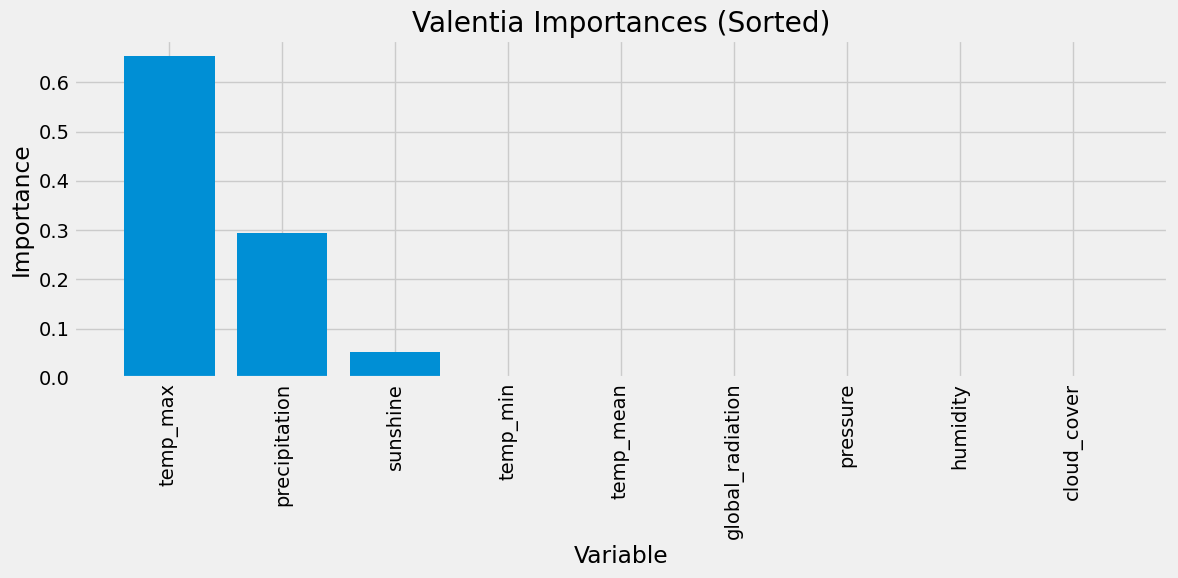

In [562]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(ftr)

# Sort the data in descending order
sorted_indices = np.argsort(important)[::-1]
sorted_important = np.array(important)[sorted_indices]
sorted_stn = np.array(ftr)[sorted_indices]

# Create the plot
plt.figure(figsize=(12, 6))
x_values = list(range(len(sorted_important)))
plt.bar(x_values, sorted_important, orientation='vertical')
plt.xticks(x_values, sorted_stn, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Valentia Importances (Sorted)')
plt.tight_layout()
plt.show()
